## Getting the groups of SDR proteins

In [1]:
# import Bio
# import Bio.Phylo as phylo
import pandas as pd

Let's load the Newick tree derived from the Clustal alignment. 

In [7]:
tree = phylo.read('../data/sdr.dnd', 'newick')

Let's plot it to take a look

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

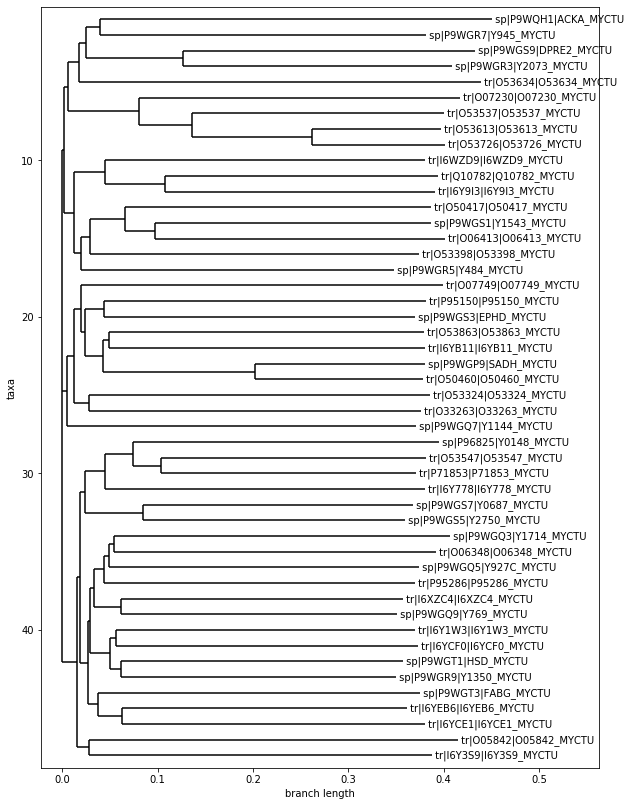

In [14]:
fig, ax = plt.subplots(figsize = (10, 14))
phylo.draw(tree, axes = ax)

Nice! We can clearly see that there are four main clades. Let's annotate the sequences.

In [15]:
leaves = list(tree.get_terminals())

In [26]:
leaves[8].name.split('|')[-1]

'O53726_MYCTU'

Let's load the file with the gene names 

In [23]:
df = pd.read_csv('../data/sdrs_gene_names.tsv', sep = '\t')

In [24]:
df.head()

,yourlist:M202005218BC4D7ADE02784B0C2481C7F3DE0963A1E827BF,Entry,Entry name,Status,Protein names,Gene names,Organism,Length
0,DPRE2_MYCTU,P9WGS9,DPRE2_MYCTU,reviewed,Decaprenylphosphoryl-2-keto-beta-D-erythro-pen...,dprE2 Rv3791 MTCY13D12.25,Mycobacterium tuberculosis (strain ATCC 25618 ...,254
1,FABG_MYCTU,P9WGT3,FABG_MYCTU,reviewed,3-oxoacyl-[acyl-carrier-protein] reductase Fab...,fabG1 mabA Rv1483 MTCY277.04,Mycobacterium tuberculosis (strain ATCC 25618 ...,247
2,HSD_MYCTU,P9WGT1,HSD_MYCTU,reviewed,3-alpha-(or 20-beta)-hydroxysteroid dehydrogen...,fabG3 Rv2002 MTCY39.16c,Mycobacterium tuberculosis (strain ATCC 25618 ...,260
3,EPHD_MYCTU,P9WGS3,EPHD_MYCTU,reviewed,Probable oxidoreductase EphD (EC 1.-.-.-),ephD Rv2214c MTCY190.25c,Mycobacterium tuberculosis (strain ATCC 25618 ...,592
4,SADH_MYCTU,P9WGP9,SADH_MYCTU,reviewed,Putative oxidoreductase SadH (EC 1.-.-.-),sadH Rv3085,Mycobacterium tuberculosis (strain ATCC 25618 ...,276


Let's get the uniprot ids from the leaves of the tree. 

In [33]:
uniprot_id = [x.name.split('|')[-1] for x in leaves]

In [37]:
# Take a look 
uniprot_id[:5]

['ACKA_MYCTU', 'Y945_MYCTU', 'DPRE2_MYCTU', 'Y2073_MYCTU', 'O53634_MYCTU']

Now, we have to do an array encoding the groups of SDRs. 

In [47]:
#a0-8, 9-16, 17- 26, 27 -33, 34 -48 

groups = [1]*9 + [2]*8 +  [3]*10 + [4]*21

In [49]:
# 
len(groups) == len(uniprot_id)

True

In [50]:
sdr_groups = pd.DataFrame(
    {
        'Entry name' : uniprot_id, 
        'groups': groups
    }
)

In [51]:
sdr_groups.head()

,Entry name,groups
0,ACKA_MYCTU,1
1,Y945_MYCTU,1
2,DPRE2_MYCTU,1
3,Y2073_MYCTU,1
4,O53634_MYCTU,1


Now, let's merge both dataframes to keep track of the groups. 

In [52]:
merged = pd.merge(df, sdr_groups, on = 'Entry name', how = 'left')

In [59]:
merged.sort_values(by = ['groups'], inplace = True)

In [66]:
merged.tail(20)

,yourlist:M202005218BC4D7ADE02784B0C2481C7F3DE0963A1E827BF,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,groups
2,HSD_MYCTU,P9WGT1,HSD_MYCTU,reviewed,3-alpha-(or 20-beta)-hydroxysteroid dehydrogen...,fabG3 Rv2002 MTCY39.16c,Mycobacterium tuberculosis (strain ATCC 25618 ...,260,4
1,FABG_MYCTU,P9WGT3,FABG_MYCTU,reviewed,3-oxoacyl-[acyl-carrier-protein] reductase Fab...,fabG1 mabA Rv1483 MTCY277.04,Mycobacterium tuberculosis (strain ATCC 25618 ...,247,4
43,I6Y3S9_MYCTU,I6Y3S9,I6Y3S9_MYCTU,unreviewed,Possible oxidoreductase,Rv3530c,Mycobacterium tuberculosis (strain ATCC 25618 ...,260,4
44,I6Y1W3_MYCTU,I6Y1W3,I6Y1W3_MYCTU,unreviewed,Probable short-chain type dehydrogenase/reductase,Rv2857c,Mycobacterium tuberculosis (strain ATCC 25618 ...,258,4
45,O05842_MYCTU,O05842,O05842_MYCTU,unreviewed,Possible iron-regulated short-chain dehydrogen...,Rv3224,Mycobacterium tuberculosis (strain ATCC 25618 ...,282,4
5,Y0148_MYCTU,P96825,Y0148_MYCTU,reviewed,Putative short-chain type dehydrogenase/reduct...,Rv0148,Mycobacterium tuberculosis (strain ATCC 25618 ...,286,4
7,Y0687_MYCTU,P9WGS7,Y0687_MYCTU,reviewed,Uncharacterized NAD-dependent oxidoreductase R...,Rv0687,Mycobacterium tuberculosis (strain ATCC 25618 ...,275,4
10,Y2750_MYCTU,P9WGS5,Y2750_MYCTU,reviewed,Uncharacterized oxidoreductase Rv2750 (EC 1.-....,Rv2750,Mycobacterium tuberculosis (strain ATCC 25618 ...,272,4
34,Y769_MYCTU,P9WGQ9,Y769_MYCTU,reviewed,Uncharacterized oxidoreductase Rv0769 (EC 1.-....,Rv0769,Mycobacterium tuberculosis (strain ATCC 25618 ...,248,4
8,Y927C_MYCTU,P9WGQ5,Y927C_MYCTU,reviewed,Uncharacterized oxidoreductase Rv0927c (EC 1.-...,Rv0927c,Mycobacterium tuberculosis (strain ATCC 25618 ...,263,4


In [63]:
merged.to_csv('../data/sdr_annot_group.csv', index = False)

In [3]:
merged = pd.read_csv('../data/sdr_annot_group.csv')

In [16]:
merged.columns

Index(['yourlist:M202005218BC4D7ADE02784B0C2481C7F3DE0963A1E827BF', 'Entry',
       'Entry name', 'Status', 'Protein names', 'Gene names', 'Organism',
       'Length', 'groups'],
      dtype='object')

In [23]:
merged.head()

,yourlist:M202005218BC4D7ADE02784B0C2481C7F3DE0963A1E827BF,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,groups
0,DPRE2_MYCTU,P9WGS9,DPRE2_MYCTU,reviewed,Decaprenylphosphoryl-2-keto-beta-D-erythro-pen...,dprE2 Rv3791 MTCY13D12.25,Mycobacterium tuberculosis (strain ATCC 25618 ...,254,1
1,O53726_MYCTU,O53726,O53726_MYCTU,unreviewed,Probable dehydrogenase/reductase,Rv0439c,Mycobacterium tuberculosis (strain ATCC 25618 ...,311,1
2,O53537_MYCTU,O53537,O53537_MYCTU,unreviewed,Possible oxidoreductase,Rv2263,Mycobacterium tuberculosis (strain ATCC 25618 ...,317,1
3,O53613_MYCTU,O53613,O53613_MYCTU,unreviewed,Probable oxidoreductase,Rv0068,Mycobacterium tuberculosis (strain ATCC 25618 ...,303,1
4,Y945_MYCTU,P9WGR7,Y945_MYCTU,reviewed,Uncharacterized oxidoreductase Rv0945 (EC 1.-....,Rv0945 MTCY10D7.29c,Mycobacterium tuberculosis (strain ATCC 25618 ...,253,1


In [17]:
sdrs_annot = merged[['Entry name', 'groups']]

In [18]:
sdrs_annot['is_sdr'] = 1

/Users/manoloflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
sdrs_annot.head()

,Entry name,groups,is_sdr
0,DPRE2_MYCTU,1,1
1,O53726_MYCTU,1,1
2,O53537_MYCTU,1,1
3,O53613_MYCTU,1,1
4,Y945_MYCTU,1,1


In [4]:
tf_ko = pd.read_csv('../data/fold_change_tf_ko_plus_redox_annot.csv')

In [19]:
tf_ko_sdr = pd.merge(tf_ko, sdrs_annot, how = 'left', on = 'Entry name')

In [20]:
tf_ko_sdr.head()

,Rv_ID,gene_name,Function,Count,FC:Rv0019c,FC:Rv0020c,FC:Rv0022c,FC:Rv0023,FC:Rv0038,FC:Rv0042c,...,Sequence,Annotation_int,redox_gene_name,function_redox_,Product,Comments,UK_score_4,redox_enzyme,groups,is_sdr
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,1,0.142,0.021,-0.734,-1.683,0.102,0.272,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Rv0002,dnaN,DNA polymerase III beta subunit (EC 2.7.7.7),0,0.053,-0.022,-0.181,0.630,0.159,0.040,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,Rv0003,recF,DNA recombination and repair protein RecF,0,0.081,0.188,-0.203,-0.686,0.222,0.074,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,Rv0004,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",1,0.210,0.163,0.169,-1.077,0.112,0.292,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,Rv0005,gyrB,DNA gyrase subunit B (EC 5.99.1.3),0,0.053,0.091,-0.001,-0.689,0.114,0.165,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [25]:
tf_ko_sdr.shape

(4031, 233)

In [26]:
tf_ko.shape

(4031, 231)

In [24]:
tf_ko_sdr[tf_ko_sdr['Entry name'] == 'DPRE2_MYCTU']

,Rv_ID,gene_name,Function,Count,FC:Rv0019c,FC:Rv0020c,FC:Rv0022c,FC:Rv0023,FC:Rv0038,FC:Rv0042c,...,Sequence,Annotation_int,redox_gene_name,function_redox_,Product,Comments,UK_score_4,redox_enzyme,groups,is_sdr
3870,Rv3791,NaN,3-oxoacyl-[acyl-carrier protein] reductase par...,0,-0.026,-0.053,-0.338,-0.614,0.111,-0.084,...,MVLDAVGNPQTVLLLGGTSEIGLAICERYLHNSAARIVLACLPDDP...,5.0,dprE2,"Together with DPRE2|Rv3791, catalyzes epimeriz...",Decaprenylphosphoryl-D-2-keto erythro pentose ...,"Rv3791, (MTCY13D12.25), len: 254 aa. DprE2, de...",1.0,1.0,1.0,1.0


In [28]:
tf_ko_sdr.is_sdr =  tf_ko_sdr.is_sdr.replace(np.nan, 0)

In [29]:
tf_ko_sdr[tf_ko_sdr['Entry name'] == 'DPRE2_MYCTU']

,Rv_ID,gene_name,Function,Count,FC:Rv0019c,FC:Rv0020c,FC:Rv0022c,FC:Rv0023,FC:Rv0038,FC:Rv0042c,...,Sequence,Annotation_int,redox_gene_name,function_redox_,Product,Comments,UK_score_4,redox_enzyme,groups,is_sdr
3870,Rv3791,NaN,3-oxoacyl-[acyl-carrier protein] reductase par...,0,-0.026,-0.053,-0.338,-0.614,0.111,-0.084,...,MVLDAVGNPQTVLLLGGTSEIGLAICERYLHNSAARIVLACLPDDP...,5.0,dprE2,"Together with DPRE2|Rv3791, catalyzes epimeriz...",Decaprenylphosphoryl-D-2-keto erythro pentose ...,"Rv3791, (MTCY13D12.25), len: 254 aa. DprE2, de...",1.0,1.0,1.0,1.0


In [35]:
tf_ko_sdr.groups = tf_ko_sdr.groups.replace(np.nan, 0)

In [37]:
tf_ko_sdr.columns[-20:]

Index(['alternative_gene_names', 'Length', 'Cross-reference (InterPro)',
       'Cross-reference (Pfam)', 'Cross-reference (CDD)',
       'Cross-reference (Gene3D)', 'Cross-reference (HAMAP)',
       'Cross-reference (TIGRFAMs)', 'Cross-reference (PIRSF)', 'Annotation',
       'Sequence', 'Annotation_int', 'redox_gene_name', 'function_redox_',
       'Product', 'Comments', 'UK_score_4', 'redox_enzyme', 'groups',
       'is_sdr'],
      dtype='object')

In [36]:
tf_ko_sdr.head()

,Rv_ID,gene_name,Function,Count,FC:Rv0019c,FC:Rv0020c,FC:Rv0022c,FC:Rv0023,FC:Rv0038,FC:Rv0042c,...,Sequence,Annotation_int,redox_gene_name,function_redox_,Product,Comments,UK_score_4,redox_enzyme,groups,is_sdr
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,1,0.142,0.021,-0.734,-1.683,0.102,0.272,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Rv0002,dnaN,DNA polymerase III beta subunit (EC 2.7.7.7),0,0.053,-0.022,-0.181,0.630,0.159,0.040,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Rv0003,recF,DNA recombination and repair protein RecF,0,0.081,0.188,-0.203,-0.686,0.222,0.074,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Rv0004,NaN,"Zn-ribbon-containing, possibly RNA-binding pro...",1,0.210,0.163,0.169,-1.077,0.112,0.292,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Rv0005,gyrB,DNA gyrase subunit B (EC 5.99.1.3),0,0.053,0.091,-0.001,-0.689,0.114,0.165,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [38]:
cols = ['Rv_ID', 'is_sdr', 'Function', 'groups', 'redox_enzyme', 'function_redox_', 'UK_score_4']

In [39]:
annot = tf_ko_sdr[cols]

In [41]:
annot.to_csv('../data/annot_master_v0.csv', index = False)